# Adding the standard deviation of employee's answer to the April 2018 summary data set

### Reads in the extra data set from an excel file (renamed to /datasets/ActivatedInsights/EmployeeData_May_2018_Results.xlsx)¶

- Approximate the variability in the Employee answers by how much the answers for that location varied along the first principal component (of the entire answers).
- Normalize and standardize the data

### Save data (as .pkl file)

- Save the variability info for each location.

In [1]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.decomposition import PCA


### Read in the excel file that contains the individual answers

In [2]:
#Read the new excel file, this contains the individual answers.
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/EmployeeData_May_2018_Results.xlsx'
data1 = pd.read_excel(current_path + file, sheet_name = 1)

In [3]:
#Confirm the data
data1.head()

,RespondentId,1,2,3,4,5,6,7,8,9,...,Location Code,Managerial Level,Marital Status,Meaningful Innovation Opportunities,Pay Type (Hourly/Salaried),Race/ Ethnicity,Responsibility,Tenure-GPTW,Tenure-SeniorCare,Zip within the area
0,182227,4,5,5,4,4,5,5,3,5,...,1075,Employee/Individual Contributor,Married,A lot,Hourly,Caucasian or White,Neither children nor elders,Less than 2 years,6 months to 9 months,32789
1,182658,5,5,5,5,5,5,5,5,5,...,5504,Frontline manager or supervisor,Married,A lot,Salaried,Caucasian or White,Children,Less than 2 years,3 months to 6 months,80107
2,182740,5,5,5,4,4,5,4,5,5,...,5504,Employee/Individual Contributor,Single,A lot,Hourly,Caucasian or White,Both children and elders,Less than 2 years,9 months to 1 year,80107
3,182750,5,5,5,5,5,5,5,5,5,...,5504,Frontline manager or supervisor,Not Indicated,A lot,Hourly,Caucasian or White,Both children and elders,Over 20 years,Over 20 years,80107
4,182755,5,5,5,5,5,5,5,5,5,...,5504,Frontline manager or supervisor,Single,A lot,Hourly,Caucasian or White,Elders,Less than 2 years,1 year to 2 years,80107


In [4]:
#Rename the location code column
data1.rename(columns = {'Location Code':'LocationCode'}, inplace = True) 

### Load the 2018 May dataset to match the location code

In [6]:
#Load the 2018 May dataset.
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file2 = '/datasets/ActivatedInsights/ActivatedInsight.xlsx'
data2 = pd.read_excel(current_path + file2)

#First two rows are excel column names that only exists for some columns. Remove them for now.
#Also some of the last few rows have no data in most columns.
data2 = data2.iloc[2:-13]
#LocationCode will contain the column for the location code for this study use the May 2018 code
LocationCode_for_data = data2.iloc[:,0]

In [7]:
#Individual answers
Answers=data1.iloc[:,1:61]

### Check how much variance in the answers are explained by top 5 principal components

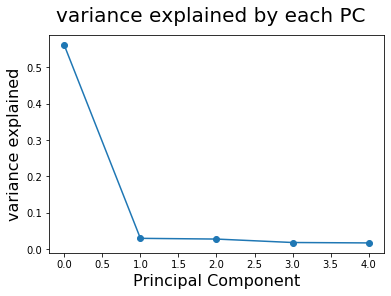

In [9]:
#Run PCA to reduce the features to the top 5
pcaA=PCA(n_components=5)
pcaA.fit(Answers)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pcaA.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Answers into principal component space
DataArrayPCA_answers=pcaA.transform(Answers)

In [11]:
#Calculate the variance in the answers at each location (along principal component 1)
DataArrayPCA_answers_df=pd.DataFrame(data=DataArrayPCA_answers)

#
location_variance = np.zeros((LocationCode_for_data.shape[0],1))

#Get the data for each location, calculate the variance of PC1 for that location.
for index in range(LocationCode_for_data.shape[0]):
    TestLocationData=DataArrayPCA_answers_df.loc[data1['LocationCode'] == LocationCode_for_data.iloc[index],0]
    #calculate the variance for that location
    location_variance[index] = TestLocationData.var()
location_variance = pd.DataFrame(data=location_variance)

### Plot the answer variance for each location

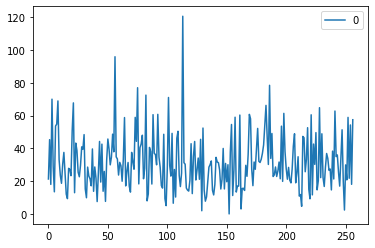

In [12]:
sb.lineplot(data=location_variance)

### Standard deviation of the answers at each location

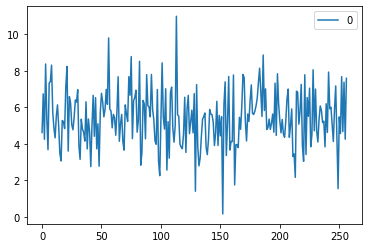

In [13]:
location_sd=np.sqrt(location_variance)
sb.lineplot(data=location_sd)

### Standardize the "standard deviation of the answers" at each location

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0210567c50>]],
      dtype=object)

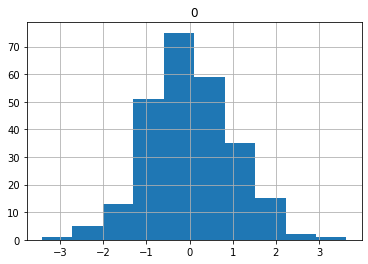

In [14]:
#standardize the sd for each location.
scaler_location_sd = pp.StandardScaler().fit(location_sd)
location_sdS = scaler_location_sd.transform(location_sd)
location_sdS_df=pd.DataFrame(data=location_sdS)
location_sdS_df.hist()

### Save as .pkl file

In [15]:
#save for later use
location_sdS_df.to_pickle("./location_sdS_df.pkl")